In [1]:
from markovag import markov, cad
from sympy import Symbol
from sympy import var
from sympy import S
from sympy.matrices import Matrix, eye, zeros
from sympy.plotting import PlotGrid
import numpy as np
from scipy.spatial import ConvexHull
from sympy import expand, latex
from sympy.abc import x,y,z

In [2]:
P = markov.parse_matrix([['?', '?', '?'], ['?', '?', '?'], [0,0,1]], new_var_name='p')
pi = markov.parse_matrix([1,0,0])
R = markov.parse_matrix(['?', '?', '?'], new_var_name='r')

ineq = markov.total_reward_ineq(P, pi, R, 2, ['>=', 3])

In [3]:
ineq

-3*p_1_1*p_2_2 + 3*p_1_1 + 3*p_1_2*p_2_1 + p_1_2*r_2 - p_2_2*r_1 + 3*p_2_2 + r_1 - 3 >= 0

In [17]:
ineq_subbed =\
ineq.subs({
    #P[0,0] : 0.5,
    P[0,1] : 0.4,
    P[1,0] : 0.1,
    #P[1,1] : 0.1,
    R[0] : 1,
    R[1] : 0.5
})

In [18]:
expand(ineq_subbed)

-3*p_1_1*p_2_2 + 3*p_1_1 + 2*p_2_2 - 1.68 >= 0

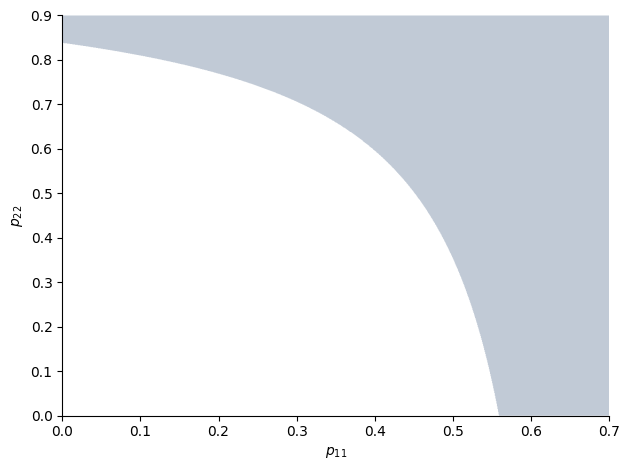

In [19]:
markov.plot_simple(ineq_subbed, x_var=(P[0,0], 0, 0.7), y_var=(P[1,1], 0, 0.9), line_color="#C1CAD6", alpha=0.5, axis_center=(0,0))

In [38]:
# classic mesh grid way
valid_points = []
invalid_points = []
for p in [0, 0.3, 0.6]:
    for q in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        if ineq_subbed.subs({P[0,0]:p, P[1,1]:q}) == True:
            valid_points.append([p,q])
        else:
            invalid_points.append([p,q])

In [47]:
conn = [[0, 0.9], [0.3, 0.8], [0.6,0]] # points to connect with lines

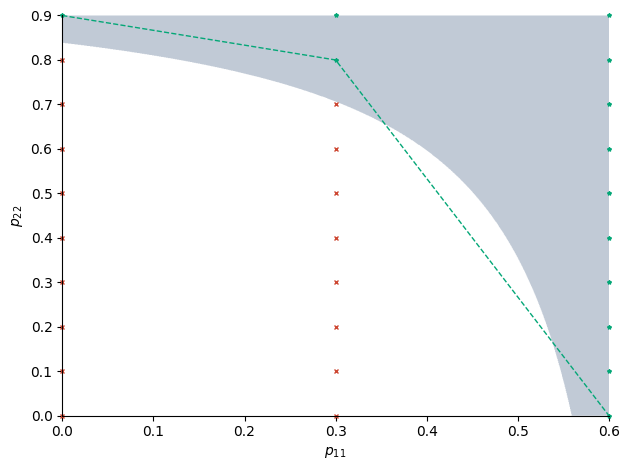

In [48]:
plt = markov.plot_simple(ineq_subbed, x_var=(P[0,0], 0, 0.6), y_var=(P[1,1], 0, 0.9), line_color="#C1CAD6", alpha=0.5, axis_center=(0,0),
                         markers=[{'args': [[v[0] for v in valid_points], [v[1] for v in valid_points], '*'], 'color': "#04A777", "ms": 3, "clip_on":False},
                                  {'args': [[v[0] for v in invalid_points], [v[1] for v in invalid_points], 'x'], 'color': "#CD4631", "ms": 3, "clip_on":False},
                                  {'args': [[c[0] for c in conn], [c[1] for c in conn]], 'color': "#04A777", 'ls':'--', 'lw':1}])

In [4]:
simplex = cad.glue_simplex_cads([cad.simplex_cad(P[0,:2], sub=True, absorbing=True), cad.simplex_cad(P[1,:2], sub=True, absorbing=True)])
gs = cad.make_g_functions(ineq.lhs, [R[0], R[1]])
simplex = cad.simplex_extensible_cad(simplex, gs[0], gs[1:], [R[0], R[1]])

In [50]:
cad.cad_print(simplex)

root
├──  $p_1_1 = 0$
│   ├──  $0 < p_1_2 < 1$
│   │   ├──  $p_2_1 = 0$
│   │   │   ├──  $0 < p_2_2 < 1$
│   │   │   │   ├──  $r_1 = 0$
│   │   │   │   │   ├──  $r_2 = \frac{3 - 3 p_{2 2}}{p_{1 2}}$
│   │   │   │   │   └──  $r_2 > \frac{3 - 3 p_{2 2}}{p_{1 2}}$
│   │   │   │   ├──  $0 < r_1 < \frac{3 - 3 p_{2 2}}{1 - p_{2 2}}$
│   │   │   │   │   ├──  $r_2 = \frac{- 3 p_{2 2} - r_{1} \cdot \left(1 - p_{2 2}\right) + 3}{p_{1 2}}$
│   │   │   │   │   └──  $r_2 > \frac{- 3 p_{2 2} - r_{1} \cdot \left(1 - p_{2 2}\right) + 3}{p_{1 2}}$
│   │   │   │   ├──  $r_1 = \frac{3 - 3 p_{2 2}}{1 - p_{2 2}}$
│   │   │   │   │   ├──  $r_2 = 0$
│   │   │   │   │   └──  $r_2 > 0$
│   │   │   │   └──  $r_1 > \frac{3 - 3 p_{2 2}}{1 - p_{2 2}}$
│   │   │   │       ├──  $r_2 = 0$
│   │   │   │       └──  $r_2 > 0$
│   │   │   └──  $p_2_2 = 1$
│   │   │       ├──  $r_1 = 0$
│   │   │       │   ├──  $r_2 = 0$
│   │   │       │   └──  $r_2 > 0$
│   │   │       └──  $r_1 > 0$
│   │   │           ├──  $r_2 = 0$
│

In [27]:
ifr_simplex = cad.ifr_simplex_cad([[P[0,0], P[0,1], P[0,2]], [P[1,0], P[1,1], P[1,2]]])
gs = cad.make_g_functions(ineq.lhs, [R[0], R[1]])
ifr_simplex = cad.simplex_extensible_cad(ifr_simplex, gs[0], gs[1:], [R[0], R[1]])

In [28]:
cad.cad_print(ifr_simplex)

root
├──  $p_1_1 = 0$
│   ├──  $p_1_2 = 0$
│   │   └──  $p_1_3 = 1$
│   │       └──  $p_2_1 = 0$
│   │           └──  $p_2_2 = 0$
│   │               └──  $p_2_3 = 1$
│   │                   ├──  $r_1 = 3$
│   │                   │   ├──  $r_2 = 0$
│   │                   │   └──  $r_2 > 0$
│   │                   └──  $r_1 > 3$
│   │                       ├──  $r_2 = 0$
│   │                       └──  $r_2 > 0$
│   ├──  $0 < p_1_2 < 1$
│   │   └──  $p_1_3 = 1 - p_{1 2}$
│   │       └──  $p_2_1 = 0$
│   │           ├──  $p_2_2 = 0$
│   │           │   └──  $p_2_3 = 1$
│   │           │       ├──  $r_1 = 0$
│   │           │       │   ├──  $r_2 = \frac{3}{p_{1 2}}$
│   │           │       │   └──  $r_2 > \frac{3}{p_{1 2}}$
│   │           │       ├──  $0 < r_1 < 3$
│   │           │       │   ├──  $r_2 = \frac{3 - r_{1}}{p_{1 2}}$
│   │           │       │   └──  $r_2 > \frac{3 - r_{1}}{p_{1 2}}$
│   │           │       ├──  $r_1 = 3$
│   │           │       │   ├──  $r_2 = 0$
│   │   